In [39]:
# The age data is only broken into 3 categories '00 to 17', '18 to 64', '65 to 80+'
# education: Children under 15', 'No high school diploma','High school or equivalent', 
#'Some college, less than 4-yr degree', "Bachelor's degree or higher
#Year: 2008-2014 (other data set is for 2012-2022)
# we can look at  high schoo, some college and college vs income
#we can look at the data over time and for men vs women
#there are some mismatches between the two data sets
#EAPI is income and doesn't require current employment (and may reflect nonemployment income),
#so it is lower
#Matt -- EPI dataset: Men vs women, trends over time 
#(Statistical difference -- linear regression, p-value, t-test/ ANOVA/Chi-Squared)
        
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# import income by education attainment data
data = pd.read_csv("../api-sorcery/Resources/economic_personal_income_clean.csv")

In [41]:
# make a data frame
income_df=pd.DataFrame(data)

In [42]:
income_df.head()

,Education Level,Year,Age,Gender,Personal Income,Population Count
0,Children under 15,2008-01-01,00 to 17,Male,No Income,NaN
1,No high school diploma,2008-01-01,00 to 17,Male,No Income,650889.0
2,No high school diploma,2008-01-01,00 to 17,Male,"5,000 - 9,999",30152.0
3,No high school diploma,2008-01-01,00 to 17,Male,"10,000 - 14,000",7092.0
4,No high school diploma,2008-01-01,00 to 17,Male,"15,000 - 24,999",3974.0


In [43]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Education Level   1060 non-null   object 
 1   Year              1060 non-null   object 
 2   Age               1060 non-null   object 
 3   Gender            1060 non-null   object 
 4   Personal Income   1060 non-null   object 
 5   Population Count  1026 non-null   float64
dtypes: float64(1), object(5)
memory usage: 49.8+ KB


In [44]:
income_df["Year"].value_counts()

2011-01-01    155
2009-01-01    153
2010-01-01    153
2012-01-01    151
2014-01-01    150
2013-01-01    149
2008-01-01    149
Name: Year, dtype: int64

In [45]:
#income categories (8). We should be focussing on working class jobs (not CEO)

income_df["Personal Income"].value_counts()


No Income          173
5,000 - 9,999      142
15,000 - 24,999    139
10,000 - 14,000    139
25,000 - 34,999    122
35,000 - 49,999    118
50,000 - 74,999    115
75,000 and over    112
Name: Personal Income, dtype: int64

In [46]:
income_df["Education Level"].value_counts()

No high school diploma                 287
Some college, less than 4-yr degree    263
High school or equivalent              257
Bachelor's degree or higher            239
Children under 15                       14
Name: Education Level, dtype: int64

In [47]:
income_df["Year"].unique()

array(['2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
       '2012-01-01', '2013-01-01', '2014-01-01'], dtype=object)

In [48]:
# Gender data is complete
income_df["Gender"].value_counts()

Male      533
Female    527
Name: Gender, dtype: int64

In [49]:
income_df["Age"].value_counts()

18 to 64     448
65 to 80+    445
00 to 17     167
Name: Age, dtype: int64

In [50]:
working_income_df= income_df.loc[income_df["Age"]=="18 to 64"]

In [51]:
# create a file with just working age data (18-64) 
working_income_df


,Education Level,Year,Age,Gender,Personal Income,Population Count
21,No high school diploma,2008-01-01,18 to 64,Male,No Income,261172.0
22,No high school diploma,2008-01-01,18 to 64,Male,"5,000 - 9,999",163263.0
23,No high school diploma,2008-01-01,18 to 64,Male,"10,000 - 14,000",317119.0
24,No high school diploma,2008-01-01,18 to 64,Male,"15,000 - 24,999",573769.0
25,No high school diploma,2008-01-01,18 to 64,Male,"25,000 - 34,999",333713.0
...,...,...,...,...,...,...
992,Bachelor's degree or higher,2014-01-01,18 to 64,Female,"15,000 - 24,999",352744.0
993,Bachelor's degree or higher,2014-01-01,18 to 64,Female,"25,000 - 34,999",340611.0
994,Bachelor's degree or higher,2014-01-01,18 to 64,Female,"35,000 - 49,999",531019.0
995,Bachelor's degree or higher,2014-01-01,18 to 64,Female,"50,000 - 74,999",660048.0


In [52]:
# create a file for just women (18-64) and compare over time
# create a file for just men (18-64) and compare over time
Fworking_income_df = working_income_df.loc[working_income_df["Gender"]=="Female"]
Mworking_income_df = working_income_df.loc[working_income_df["Gender"]=="Male"]


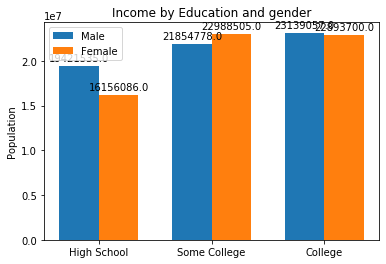

In [71]:
#compare male and femal totals

Fworking_income_df.head()
labels = ["High School", "Some College", "College"]
education = ["High School", "Some College", "College"]
BA_count = Fworking_income_df.loc[Fworking_income_df["Education Level"] == "Bachelor's degree or higher", 
                               "Population Count"].sum()
HS_count = Fworking_income_df.loc[Fworking_income_df["Education Level"] == "High school or equivalent", 
                               "Population Count"].sum()
SomeCollege_count=  Fworking_income_df.loc[Fworking_income_df["Education Level"] == "Some college, less than 4-yr degree", 
                               "Population Count"].sum()

MBA_count = Mworking_income_df.loc[Mworking_income_df["Education Level"] == "Bachelor's degree or higher", 
                               "Population Count"].sum()
MHS_count = Mworking_income_df.loc[Mworking_income_df["Education Level"] == "High school or equivalent", 
                               "Population Count"].sum()
MSomeCollege_count=  Mworking_income_df.loc[Mworking_income_df["Education Level"] == "Some college, less than 4-yr degree", 
                               "Population Count"].sum()

#plot the totals
F_count=[HS_count,SomeCollege_count,BA_count]
M_count=[MHS_count, MSomeCollege_count, MBA_count]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, M_count, width, label='Male')
rects2 = ax.bar(x + width/2, F_count, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Population')
ax.set_title('Income by Education and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


plt.show()

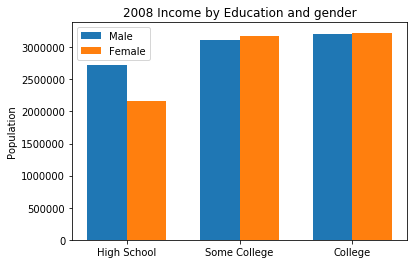

In [120]:
#create a file of education totals for a single year
Y2008_working_income_df= working_income_df.loc[working_income_df["Year"]=="2008-01-01"]
Y2008_Fworking_income_df = Y2008_working_income_df.loc[Y2008_working_income_df["Gender"]=="Female"]
Y2008_Mworking_income_df = Y2008_working_income_df.loc[Y2008_working_income_df["Gender"]=="Male"]


labels = ["High School", "Some College", "College"]
education = ["High School", "Some College", "College"]
BA_count = Y2008_Fworking_income_df.loc[Y2008_Fworking_income_df["Education Level"] == "Bachelor's degree or higher", 
                               "Population Count"].sum()
HS_count = Y2008_Fworking_income_df.loc[Y2008_Fworking_income_df["Education Level"] == "High school or equivalent", 
                               "Population Count"].sum()
SomeCollege_count=  Y2008_Fworking_income_df.loc[Y2008_Fworking_income_df["Education Level"] == "Some college, less than 4-yr degree", 
                               "Population Count"].sum()

MBA_count = Y2008_Mworking_income_df.loc[Y2008_Mworking_income_df["Education Level"] == "Bachelor's degree or higher", 
                               "Population Count"].sum()
MHS_count = Y2008_Mworking_income_df.loc[Y2008_Mworking_income_df["Education Level"] == "High school or equivalent", 
                               "Population Count"].sum()
MSomeCollege_count=  Y2008_Mworking_income_df.loc[Y2008_Mworking_income_df["Education Level"] == "Some college, less than 4-yr degree", 
                               "Population Count"].sum()

#plot the totals

F_count=[HS_count,SomeCollege_count,BA_count]
M_count=[MHS_count, MSomeCollege_count, MBA_count]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, M_count, width, label='Male')
rects2 = ax.bar(x + width/2, F_count, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Population')
ax.set_title('2008 Income by Education and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [122]:
import scipy.stats as stats
observed = pd.Series([HS_count, SomeCollege_count,BA_count])
df=pd.DataFrame([observed]).T
coeff = 0.94
#df[1] = [ MHS_count*coeff, MSomeCollege_count*coeff, MBA_count*coeff]
#df[1] = [ MHS_count, MSomeCollege_count, MBA_count]
df.columns = ["Female", "Male"]

df


,Female,Male
0,2166401.0,2557142.16
1,3169539.0,2932242.58
2,3226146.0,3014633.58


In [117]:
critical_value = stats.chi2.ppf(q = 0.95, df = 2)

8562086 /9046828

In [118]:
critical_value

5.991464547107979

In [119]:
# Chi squared tests is not useful because of differences in number, although
# it is interestimg that it's heavily not by chance that equal nmbers of female and male don't
#have the same education level
#We can mean out the populatuions for a better picture
#Chi squared is still way out of whack

stats.chisquare(df['Female'], df['Male'])

Power_divergenceResult(statistic=93750.4580719881, pvalue=0.0)